In [1]:
import pandas as pd
import pickle
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import ensemble
from sklearn import neighbors
from sklearn import tree
from sklearn import naive_bayes
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

C:\Users\ANKIA\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_excel('Raisin_Dataset.xlsx')

In [3]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [4]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [5]:
df['Class'].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [6]:
df.shape

(900, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [8]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [9]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

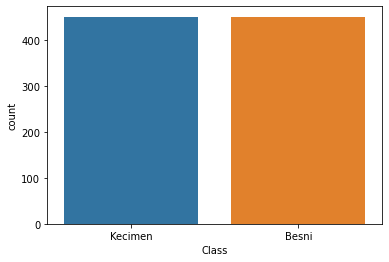

In [10]:
sns.countplot(df['Class'])

In [11]:
df['Class'].value_counts()

Besni      450
Kecimen    450
Name: Class, dtype: int64

<AxesSubplot:>

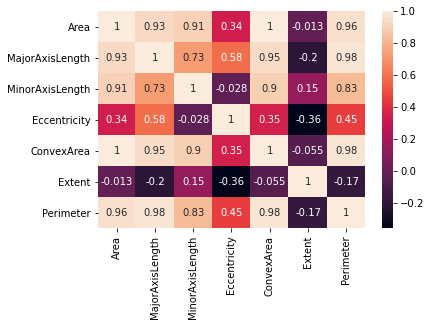

In [12]:
sns.heatmap(df.corr(), annot=True)

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'Extent'}>],
       [<AxesSubplot:title={'center':'Perimeter'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

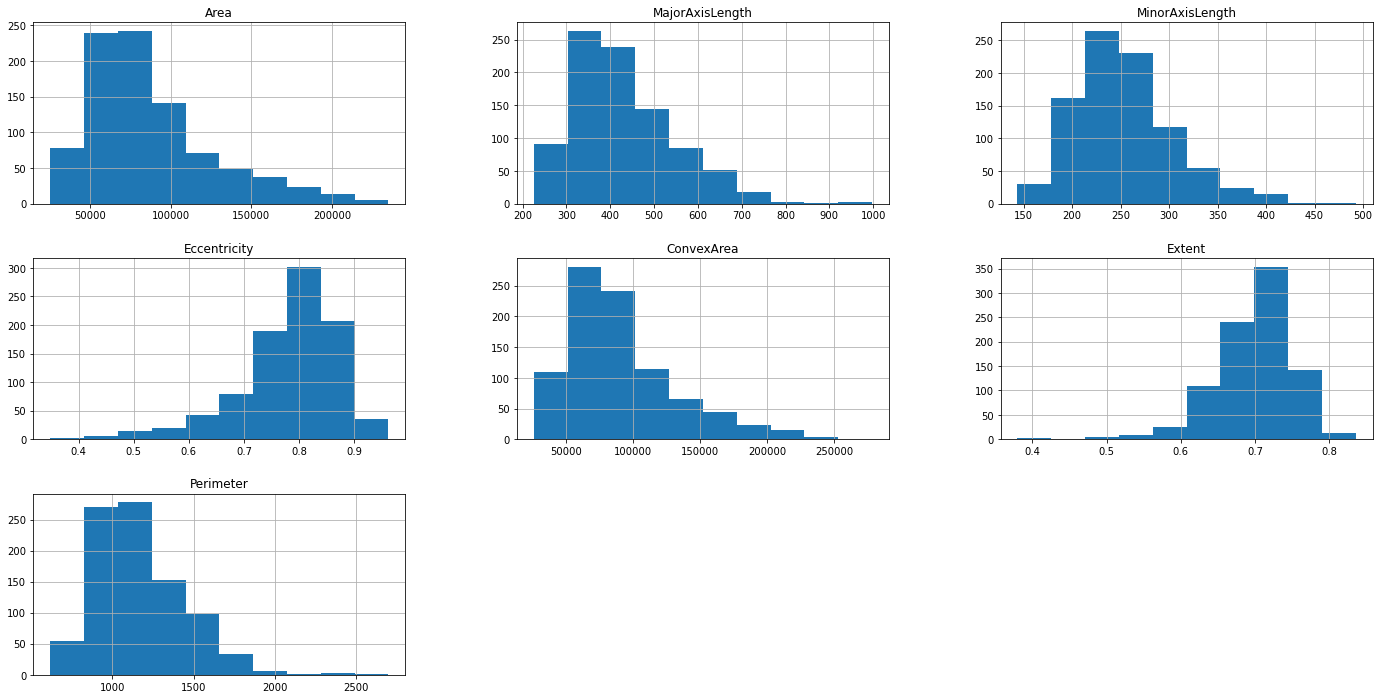

In [13]:
plt.rcParams["figure.figsize"] = (24, 12)
df.hist()

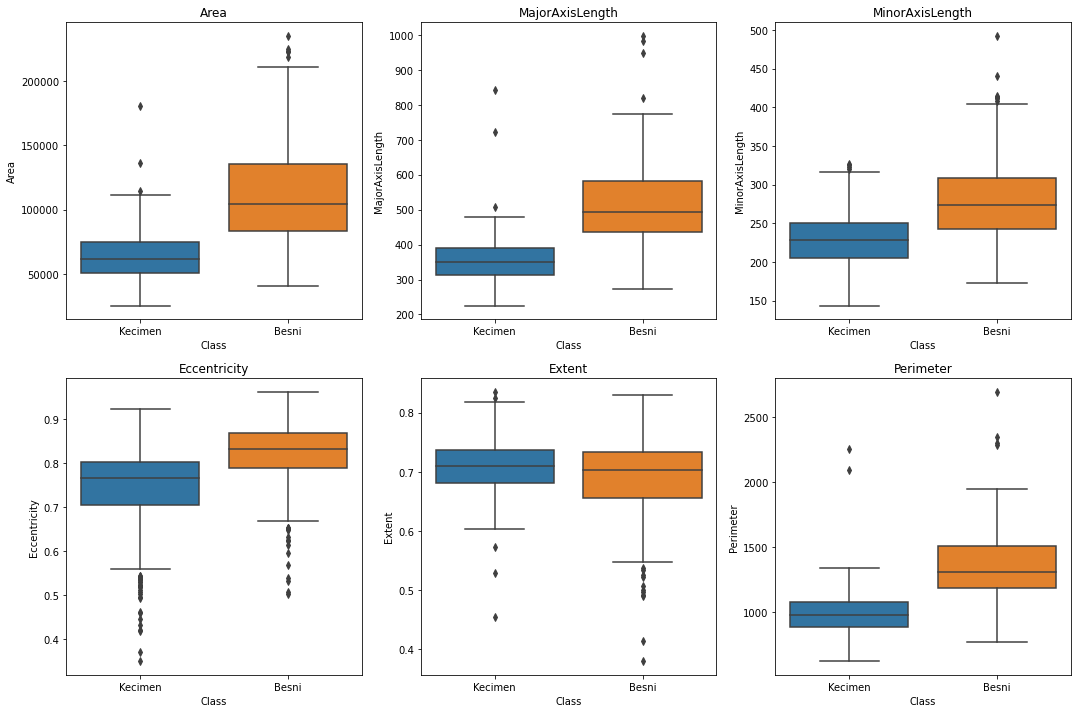

In [14]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(18, 12)
ax = ax.flatten()

features = df.columns.tolist()
features.remove('Class')  # not a feature
features.remove('ConvexArea') # it appears to be almost the same thing as Area

for axis, feature in zip(ax, features):
    sns.boxplot(data=df, x="Class", y=feature, ax=axis)
    axis.set_title(feature)

In [15]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [16]:
df.replace({'Kecimen','Besni'},{0,1},inplace = True)

In [17]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


In [18]:
X = df.iloc[:,:7]
y = df['Class']

In [19]:
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.3)
X_train.shape,y_train.shape

((630, 7), (630,))

# Model Building

In [22]:
model_list={"LogisticRegression score: ": linear_model.LogisticRegression(),
            "svm score: ": svm.SVC(),
            "KNeighborsClassifier score: ": neighbors.KNeighborsClassifier(),
            "DecisionTreeClassifier score: ": tree.DecisionTreeClassifier(),
            "RandomForestClassifier score: ": ensemble.RandomForestClassifier(),
            "GaussianNB score: ": naive_bayes.GaussianNB(),
            "Adda Boost Score"  : ensemble.AdaBoostClassifier(),
            "Gradient Boosting"  :ensemble.GradientBoostingClassifier(),
            "XG Boost" : xgb.XGBClassifier(),
           }

for key,values in model_list.items():
    values.fit(X_train,y_train)
    print(key,values.score(X_test,y_test)*100)

LogisticRegression score:  85.18518518518519
svm score:  85.18518518518519
KNeighborsClassifier score:  85.18518518518519
DecisionTreeClassifier score:  76.29629629629629
RandomForestClassifier score:  84.44444444444444
GaussianNB score:  85.18518518518519
Adda Boost Score 84.07407407407408
Gradient Boosting 84.81481481481481
[07:46:53] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost 85.18518518518519


# Hyper Parameter Tunning

# Logistic Regression

In [23]:
logModel = LogisticRegression()

In [24]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [25]:
logModel_random = RandomizedSearchCV(estimator = logModel,param_distributions = param_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [26]:
logModel_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   random_state=35, verbose=2)

In [27]:
print ('Param grid: ', param_grid, '\n')
# print the best parameters
print ('Best Parameters: ', logModel_random.best_params_, ' \n')

Param grid:  [{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 1000, 2500, 5000]}] 

Best Parameters:  {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 5000, 'C': 0.0006951927961775605}  



In [28]:
logModel_random = LogisticRegression(solver = 'liblinear', penalty ='l2', max_iter = 1000, C =11.288378916846883)
logModel_random.fit(X_train,y_train)

LogisticRegression(C=11.288378916846883, max_iter=1000, solver='liblinear')

In [29]:
y_pred = logModel_random.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.8518518518518519

In [31]:
confusion_matrix(y_test,y_pred)

array([[112,  17],
       [ 23, 118]], dtype=int64)

# Random Forest

In [32]:
#Random Forest
rf = RandomForestClassifier()

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,
            
'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [33]:
rf_random_ = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [34]:
rf_random_.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [35]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random_.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}  



In [36]:
rf_random_ = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 1, 
                                    max_features = 'sqrt',max_depth = 70, bootstrap = True)
rf_random_.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, max_features='sqrt', min_samples_split=10)

In [37]:
y_pred = rf_random_.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred)

0.8444444444444444

In [39]:
confusion_matrix(y_test,y_pred)

array([[111,  18],
       [ 24, 117]], dtype=int64)

# Dicision Tree

In [40]:
# Dicision Tree
DT = DecisionTreeClassifier()

In [41]:
params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}

In [42]:
DT_random = RandomizedSearchCV(estimator = DT,param_distributions = params,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [43]:
DT_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10, 15],
                                        'min_samples_leaf': [3, 5, 10, 15, 20],
                                        'min_samples_split': [8, 10, 12, 18, 20,
                                                              16]},
                   random_state=35, verbose=2)

In [44]:
print ('Random grid: ', params, '\n')
# print the best parameters
print ('Best Parameters: ', DT_random.best_params_, ' \n')

Random grid:  {'max_depth': [3, 5, 7, 10, 15], 'min_samples_leaf': [3, 5, 10, 15, 20], 'min_samples_split': [8, 10, 12, 18, 20, 16], 'criterion': ['gini', 'entropy']} 

Best Parameters:  {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 5, 'criterion': 'entropy'}  



In [45]:
DT = DecisionTreeClassifier(min_samples_split =  8, min_samples_leaf = 5, max_depth = 5, criterion = 'gini')
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=8)

In [46]:
y_pred = DT.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred)

0.8518518518518519

In [48]:
confusion_matrix(y_test,y_pred)

array([[110,  19],
       [ 21, 120]], dtype=int64)

In [49]:
# Gradient Boosting
GB = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [50]:
GB_random = RandomizedSearchCV(estimator = GB,param_distributions = parameters,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [51]:
GB_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500]},
                   random_state=35, verbose=2)

In [52]:
print ('Random grid: ', parameters, '\n')
# print the best parameters
print ('Best Parameters: ', GB_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 50, 250, 500], 'max_depth': [1, 3, 5, 7, 9], 'learning_rate': [0.01, 0.1, 1, 10, 100]} 

Best Parameters:  {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}  



In [53]:
GB = GradientBoostingClassifier(n_estimators = 50, max_depth = 3, learning_rate = 0.1)
GB.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50)

In [54]:
y_pred = GB.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred)

0.8481481481481481

In [56]:
confusion_matrix(y_test,y_pred)

array([[111,  18],
       [ 23, 118]], dtype=int64)

In [57]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


In [58]:
y =GB.predict([[87524,442.23,253.29,0.819,90546,0.7586,1184]])

In [137]:
y

array([0], dtype=int64)

Accuracy
1. Logistic Regression : 85.18%
2. Random Forest : 85.18 %
3. Dicision Tree : 85.18 %
4. Gradient Boosting : 84.81 %

In [139]:
ls = []
for i in df.columns:
    if(i == 'Class'):
        continue
    a = float(input(f"Enter the {i}: "))
    ls.append(a)
    
P = GB.predict(np.array(ls).reshape(1,-1))
if P == 0:
    print("Kecimen")
else:
    print("Besni")


Enter the Area: 87524
Enter the MajorAxisLength: 442.24
Enter the MinorAxisLength: 253.29
Enter the Eccentricity: 0.819
Enter the ConvexArea: 90546
Enter the Extent: 0.7587
Enter the Perimeter: 1184.04
Kecimen


In [142]:
filename = open("Gradient_Boost.pkl",'wb')
pickle.dump(GB,filename)

from above models we get almost Same accuracy for every model 

In [59]:
GB_1 = GradientBoostingClassifier()

In [60]:
filename = open("Gradient_Boost_1.pkl",'wb')
pickle.dump(GB,filename)